In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read in the csv file and drop the header which consists of the first 7 lines of the excel sheet

fp = pd.read_csv("UKExp-14sept23 - expenditure.csv", header = 7)
fp.head()

,Code,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Units,1974,1975,1976,1977,...,201819,201920,202021,202122,RSE indicator(b),% change since 201819,sig(c),trend since 201819(d),Unnamed: 59,reliability of 3 year percent relative SE
0,NaN,ALL PURCHASES OF FOOD AND DRINK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Food and drink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4657.0,4801.0,3970.0,4111.0,üüü,-12,yes,m,NaN,üüü
2,NaN,Food and non-alcoholic drinks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3942.0,4058.0,3424.0,3502.0,üüü,-11,yes,m,NaN,üüü
3,NaN,Alcoholic drinks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,715.0,743.0,546.0,609.0,üü,-15,yes,m,NaN,üüü
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN


In [3]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 61 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Code                                       357 non-null    object 
 1   Description                                30 non-null     object 
 2   Unnamed: 2                                 68 non-null     object 
 3   Unnamed: 3                                 194 non-null    object 
 4   Unnamed: 4                                 71 non-null     object 
 5   Units                                      353 non-null    object 
 6   1974                                       296 non-null    float64
 7   1975                                       296 non-null    float64
 8   1976                                       296 non-null    float64
 9   1977                                       296 non-null    float64
 10  1978                      

In [4]:
#Use this function to locate the 'code' column and only return the value of the row that corresponds to the code 
#'cat106'

food_essentials = fp.loc[fp['Code'] == 'cat106']

# Drop NaN values from the columns as some were included to help with spacing and readability in the csvb
food_essentials.dropna(axis = 1, how = 'all')


,Code,Description,Units,1974,1975,1976,1977,1978,1979,1980,...,201516,201617,201718,201819,201920,202021,202122,RSE indicator(b),% change since 201819,reliability of 3 year percent relative SE
14,cat106,"Food and drink, excluding soft drinks, alcohol...",p,331.0,403.0,469.0,547.0,602.0,690.0,776.0,...,2393.0,2452.0,2532.0,2604.0,2640.0,2880.0,2571.0,üüü,-1,üüü


In [44]:
# We used the 'cat106' row because that gives us a good understanding of the price increase on household essentials
# and we can correlate this with food bank useage easily if we see an upward trend as we saw a similar 
# trend in the data shown from the Trussel Group

food_essentials_plot = food_essentials.iloc[:,49:55]

<BarContainer object of 6 artists>

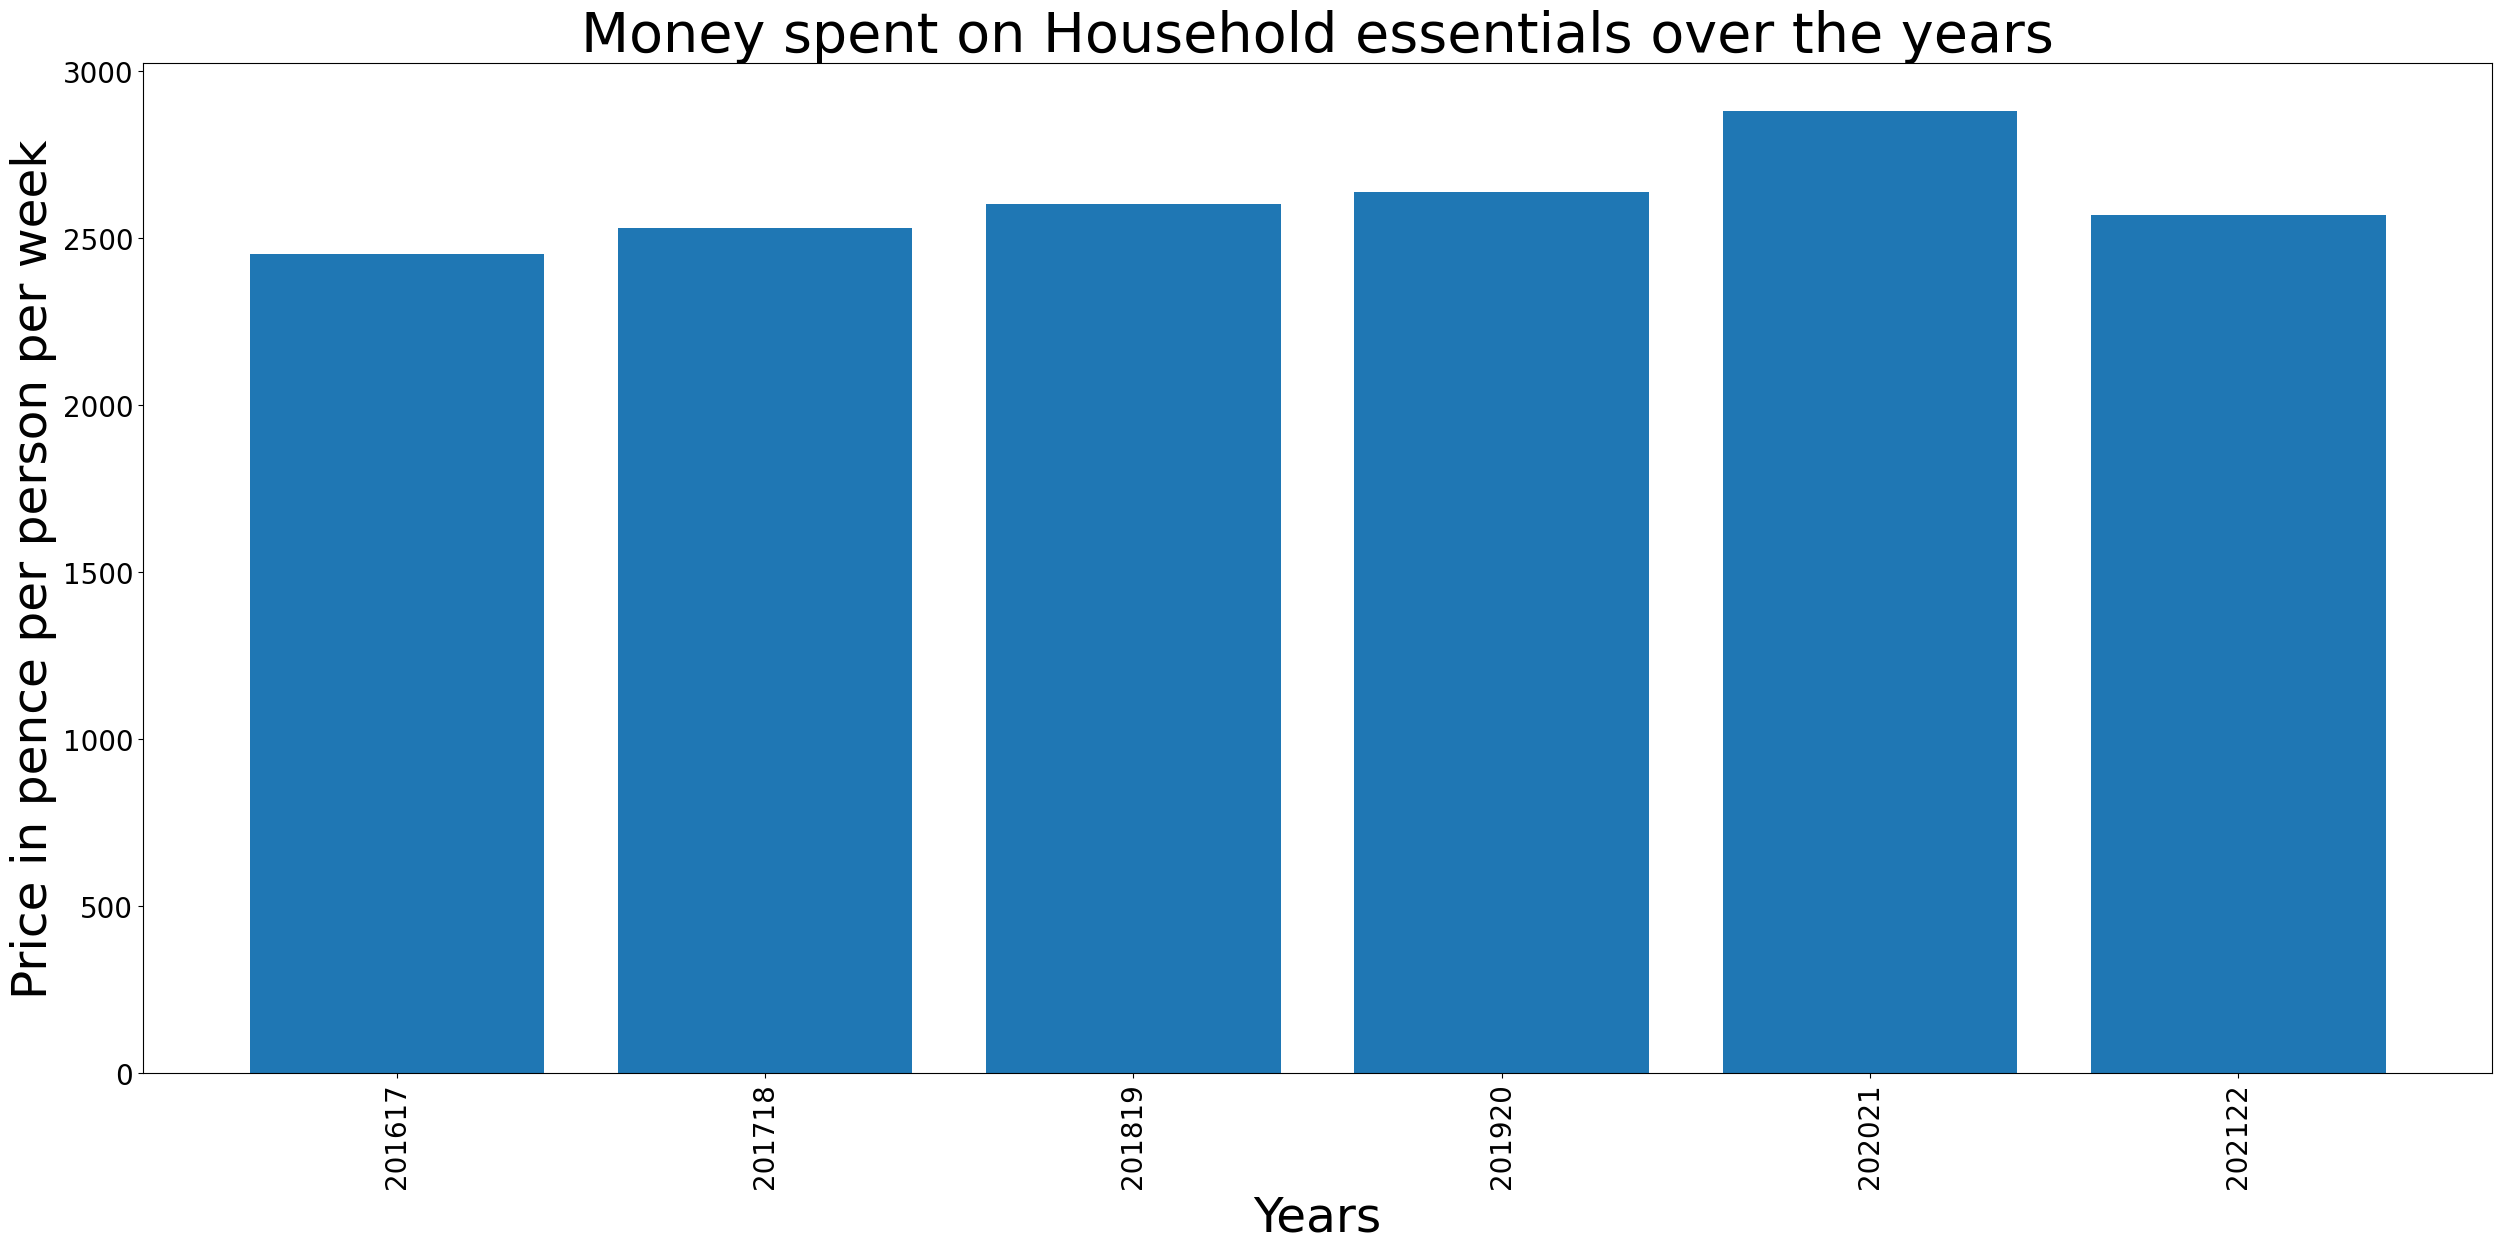

In [45]:
fig_food1 = plt.figure(figsize=(25, 12))
essentials_plot_bar1 = fig_food1.add_subplot(111)

plt.title('Money spent on Household essentials over the years', fontsize = 40)
plt.xticks(rotation = 'vertical',fontsize = 20)
plt.xlabel('Years',fontsize = 35)
plt.yticks(fontsize = 20)
plt.ylabel('Price in pence per person per week',fontsize = 35)

plt.tight_layout()
plt.bar(food_essentials_plot.columns,food_essentials_plot.iloc[0])

In [7]:
standard_milk_price = fp.loc[fp['Code'] == 'cat520']
standard_milk_price.dropna(axis = 1, how = 'all')
standard_milk_price_plot = standard_milk_price.iloc[:,6:55]

<BarContainer object of 49 artists>

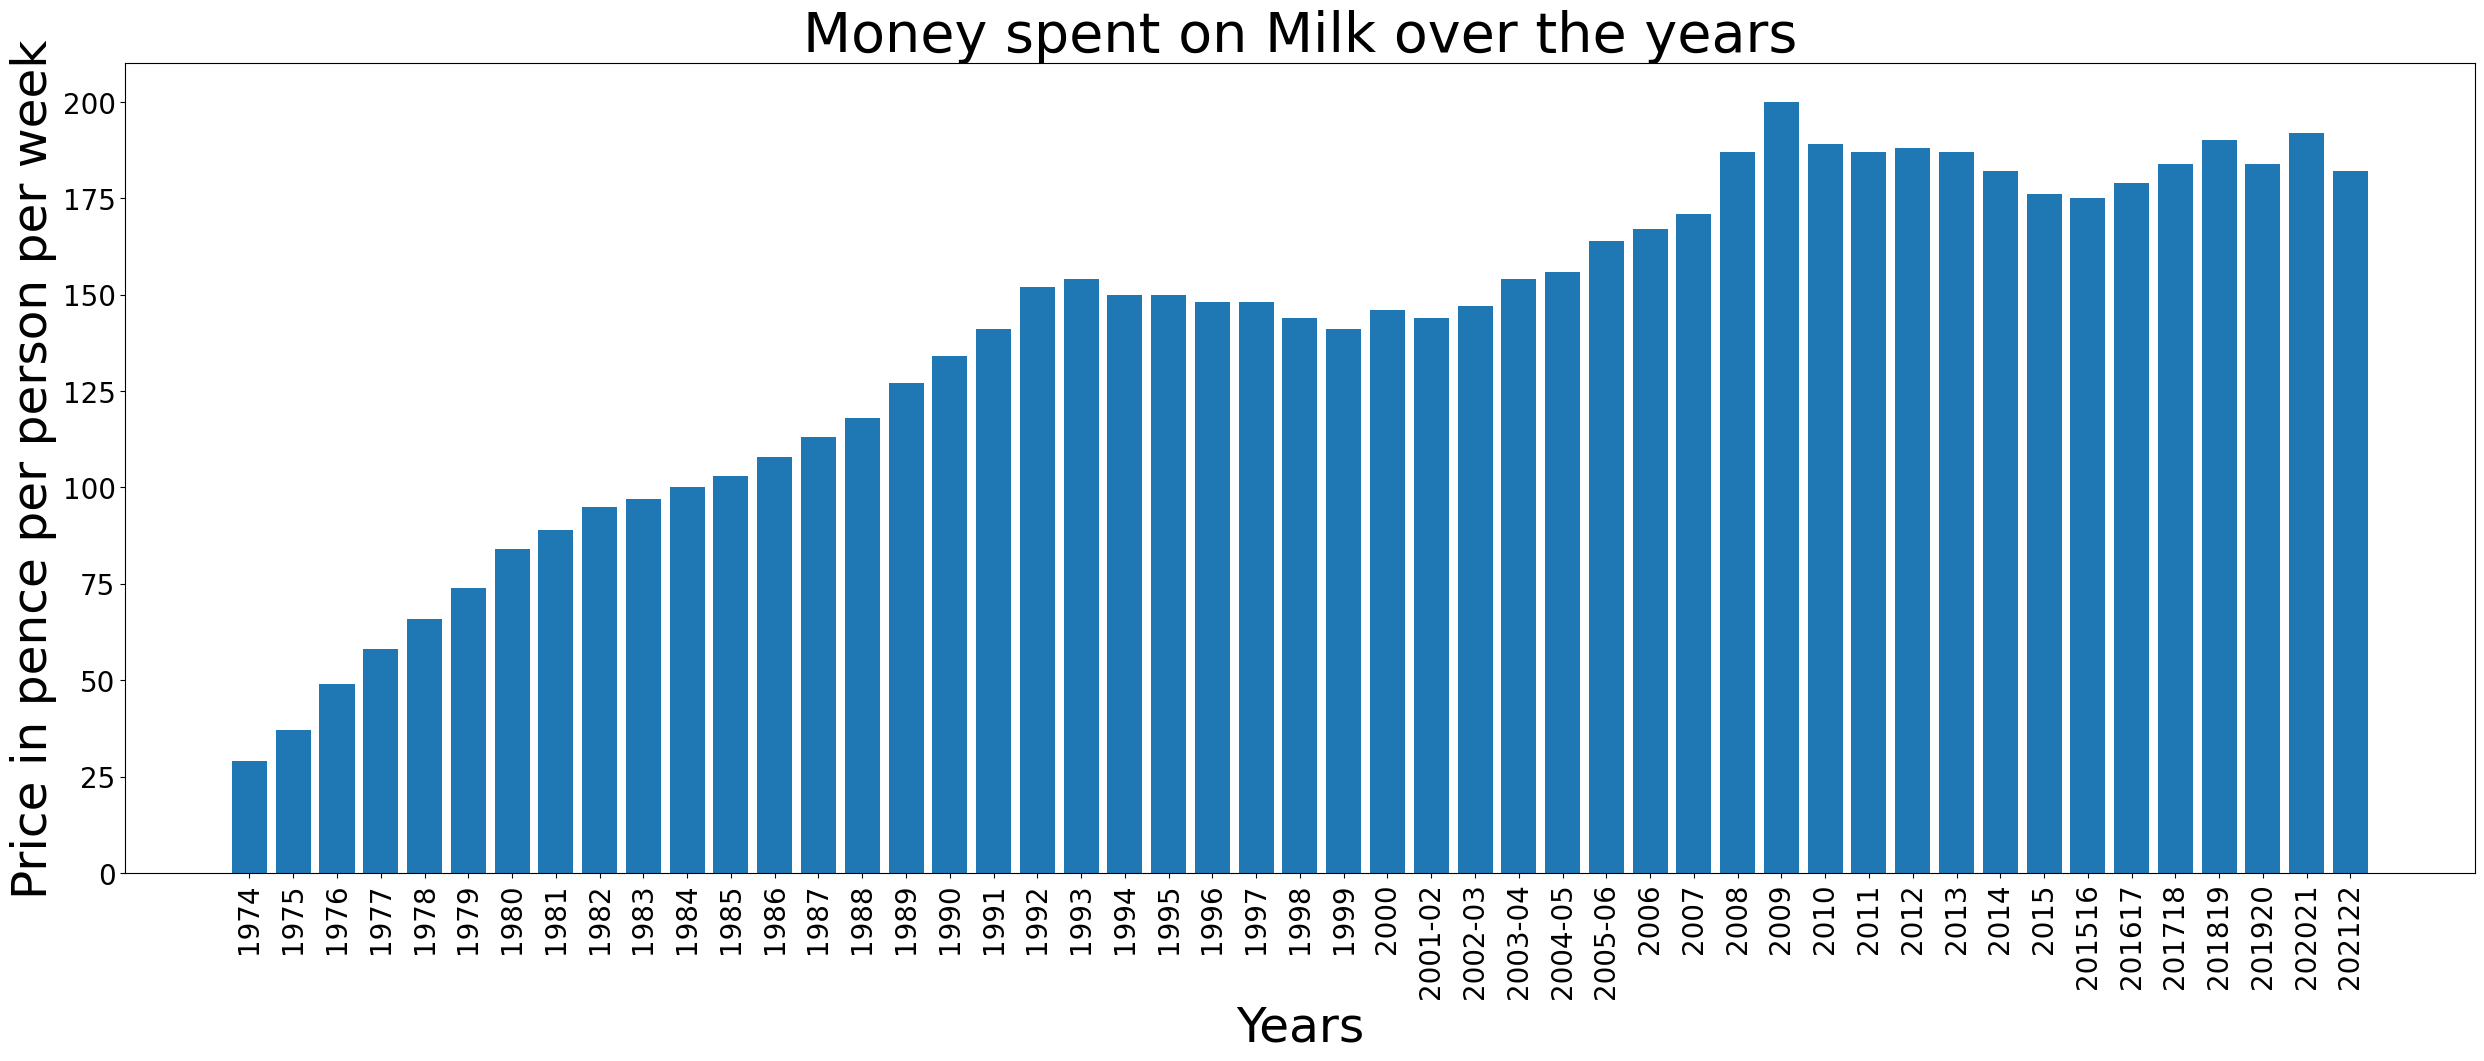

In [8]:
fig_milk = plt.figure(figsize=(25, 10))
milk_plot_bar1 = fig_milk.add_subplot(111)

plt.title('Money spent on Milk over the years', fontsize = 40)
plt.xticks(rotation = 'vertical',fontsize = 20)
plt.xlabel('Years',fontsize = 35)
plt.yticks(fontsize = 20)
plt.ylabel('Price in pence per person per week',fontsize = 35)

plt.tight_layout()
plt.bar(standard_milk_price_plot.columns,standard_milk_price_plot.iloc[0])

In [9]:
dec1 = pd.read_csv("ExpEID14sept23 - Decile_1.csv", header = 7)
dec1.head(10)

,Code,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Units,2001-02,2002-03,2003-04,2004-05,...,201617,201718,201819,201920,202021,202122,RSE indicator(a),% change since 201819,sig(b),trend since 201819(c)
0,NaN,ALL PURCHASES OF FOOD AND DRINK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Food and drink,NaN,NaN,NaN,p,2083,2044,2125,2314,...,2781.0,2876.0,3096.0,3326.0,3060.0,2831.0,û,-7,NaN,NaN
2,NaN,Food and non-alcoholic drinks,NaN,NaN,NaN,p,1826,1782,1830,2014,...,2442.0,2555.0,2731.0,2950.0,2766.0,2505.0,û,-7,NaN,NaN
3,NaN,Alcoholic drinks,NaN,NaN,NaN,p,257,262,295,300,...,338.0,321.0,365.0,376.0,294.0,326.0,û,-9,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
5,NaN,PURCHASES FOR CONSUMPTION OUTSIDE THE HOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
6,eo90001,Food and drink,NaN,NaN,NaN,p,442,468,491,536,...,586.0,558.0,652.0,654.0,184.0,362.0,NaN,-43,yes,m
7,eo90002,Food and non-alcoholic drinks,NaN,NaN,NaN,p,312,323,336,372,...,477.0,444.0,536.0,542.0,158.0,274.0,NaN,-48,yes,m
8,eo90003,Alcoholic drinks,NaN,NaN,NaN,p,129,145,155,165,...,110.0,114.0,116.0,112.0,26.0,87.0,û,-24,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN


In [32]:
decile1_food_essentials = dec1.loc[dec1['Code'] == 'cat106']
decile1_food_essentials_plot = decile1_food_essentials.iloc[:,22:49]
decile1_food_essentials.dropna(axis = 1, how = 'all')


,Code,Description,Units,2001-02,2002-03,2003-04,2004-05,2005-06,2006,2007,...,2015,201516,201617,201718,201819,201920,202021,202122,RSE indicator(a),% change since 201819
14,cat106,"Food and drink, excluding soft drinks, alcohol...",p,1381,1336,1367,1497,1446,1449.0,1511.0,...,1898.0,1902.0,1785.0,1949.0,1990.0,2185.0,2304.0,2047.0,ü,4


In [33]:
final_decile_1 = decile1_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])

In [34]:
final_decile_1.columns.to_numpy()

array(['201617', '201718', '201819', '201920', '202021', '202122'],
      dtype=object)

In [35]:
dec1_vals = final_decile_1.iloc[0].to_numpy().astype(int)
dec1_vals

array([1785, 1949, 1990, 2185, 2304, 2047])

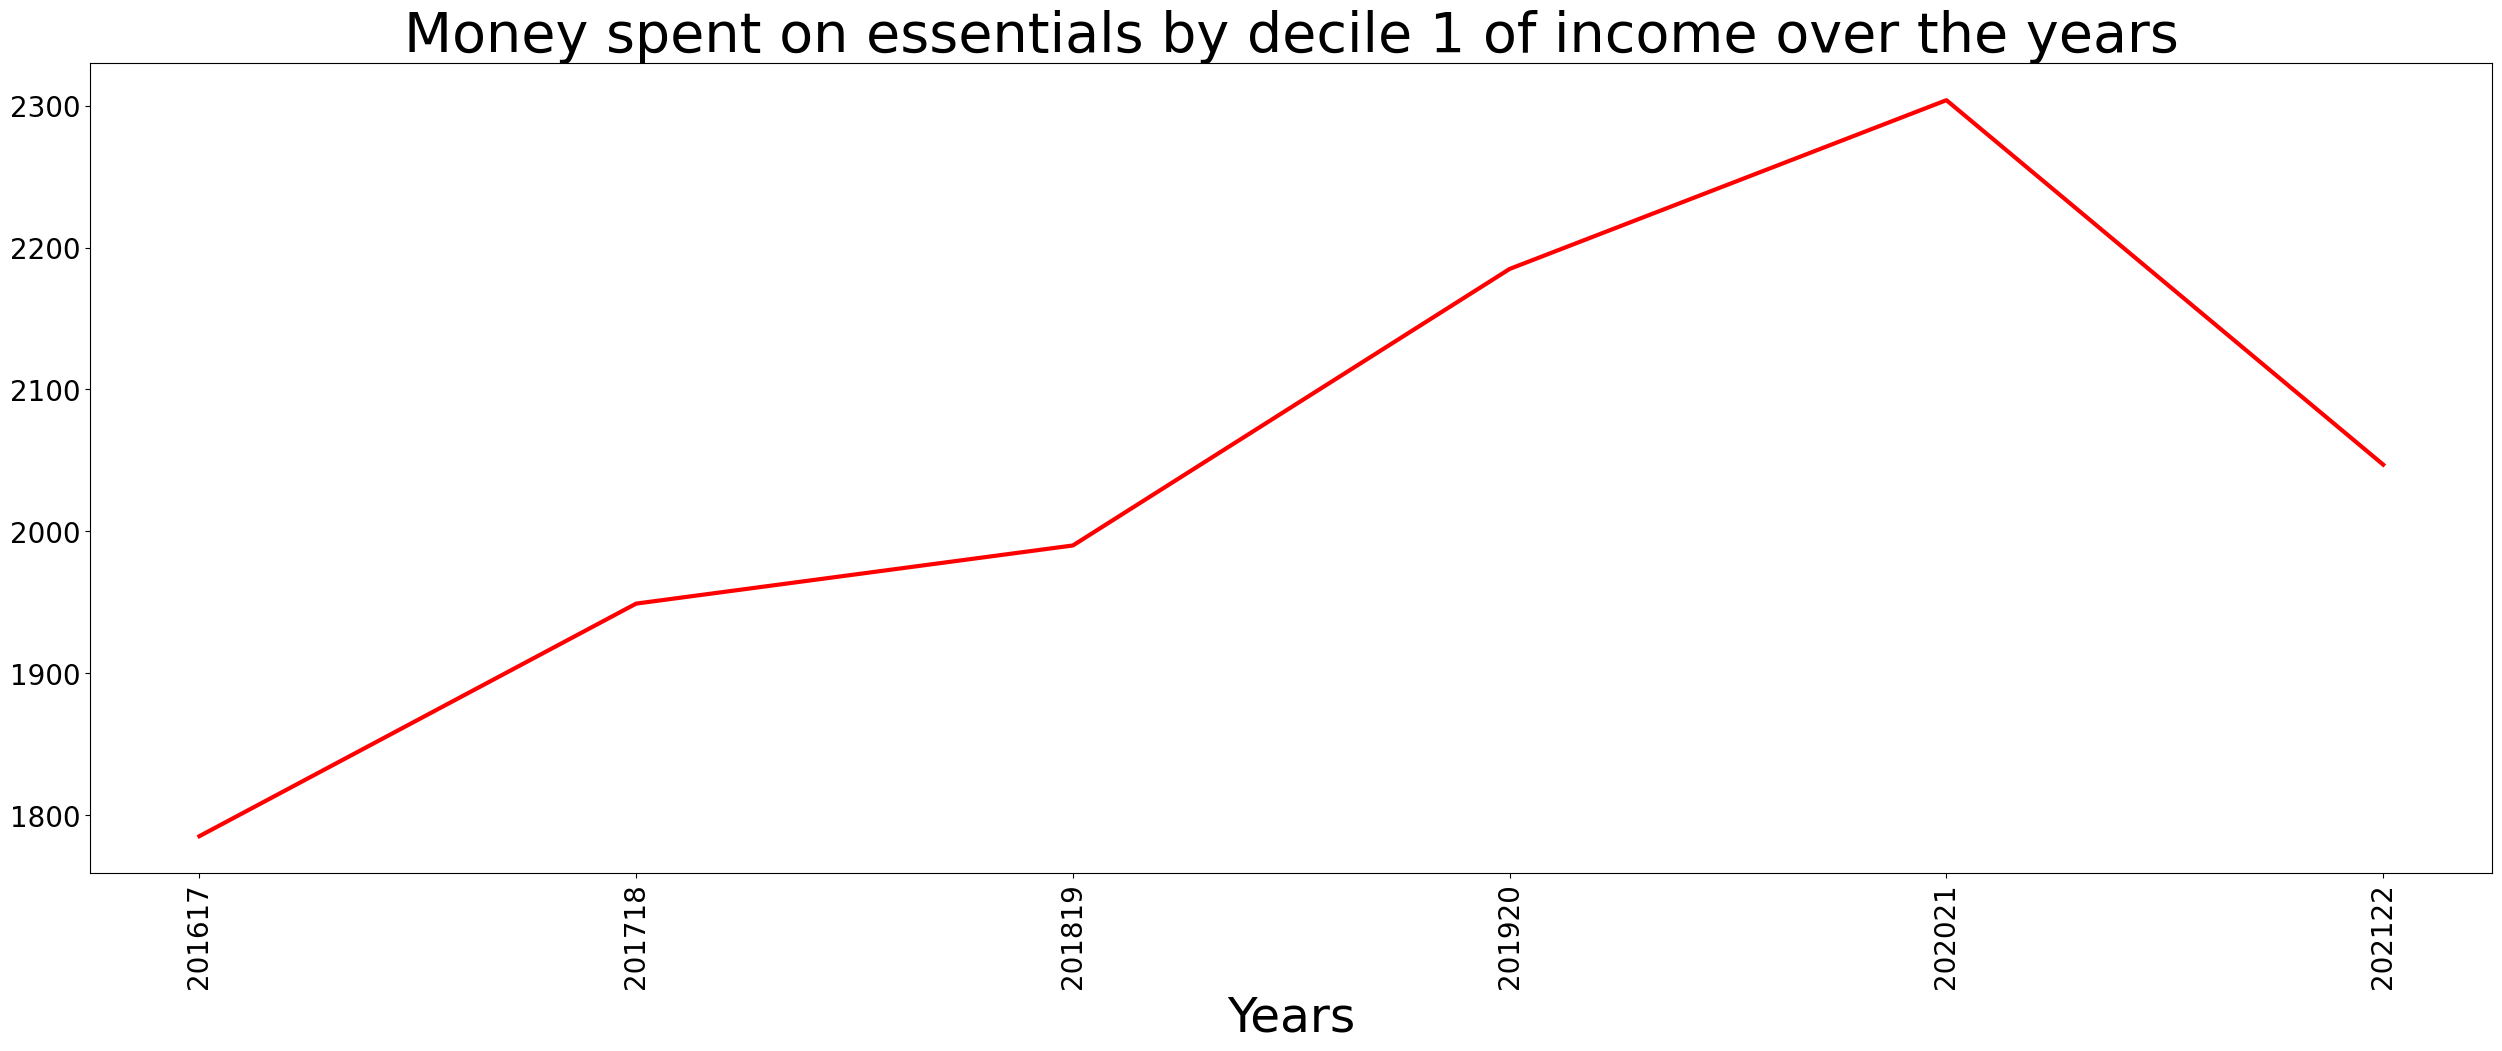

In [46]:
fig_dec1 = plt.figure(figsize=(25, 10))
dec1_bar1 = fig_dec1.add_subplot(111)

plt.title('Money spent on essentials by decile 1 of income over the years', fontsize = 40)
plt.xticks(rotation = 'vertical',fontsize = 20)
plt.xlabel('Years',fontsize = 35)
plt.yticks(fontsize = 20)

plt.tight_layout()
#plt.bar(food_essentials_plot.columns,food_essentials_plot.iloc[0])
plt.plot(final_decile_1.columns,final_decile_1.iloc[0], color = 'red', linewidth = 3)

In [68]:
dec2 = pd.read_csv("ExpEID14sept23 - Decile_2.csv", header = 7)
dec3 = pd.read_csv("ExpEID14sept23 - Decile_3.csv", header = 7)
dec4 = pd.read_csv("ExpEID14sept23 - Decile_4.csv", header = 7)
dec5 = pd.read_csv("ExpEID14sept23 - Decile_5.csv", header = 7)
dec6 = pd.read_csv("ExpEID14sept23 - Decile_6.csv", header = 7)
dec7 = pd.read_csv("ExpEID14sept23 - Decile_7.csv", header = 7)
dec8 = pd.read_csv("ExpEID14sept23 - Decile_8.csv", header = 7)
dec9 = pd.read_csv("ExpEID14sept23 - Decile_9.csv", header = 7)
dec10 = pd.read_csv("ExpEID14sept23 - Decile_10.csv", header = 7)

In [69]:
decile2_food_essentials = dec2.loc[dec2['Code'] == 'cat106']
decile2_food_essentials_plot = decile2_food_essentials.iloc[:,22:49]
decile2_food_essentials.dropna(axis = 1, how = 'all')

decile3_food_essentials = dec3.loc[dec3['Code'] == 'cat106']
decile3_food_essentials_plot = decile3_food_essentials.iloc[:,22:49]
decile3_food_essentials.dropna(axis = 1, how = 'all')

decile4_food_essentials = dec4.loc[dec4['Code'] == 'cat106']
decile4_food_essentials_plot = decile4_food_essentials.iloc[:,22:49]
decile4_food_essentials.dropna(axis = 1, how = 'all')

decile5_food_essentials = dec5.loc[dec5['Code'] == 'cat106']
decile5_food_essentials_plot = decile5_food_essentials.iloc[:,22:49]
decile5_food_essentials.dropna(axis = 1, how = 'all')

decile6_food_essentials = dec6.loc[dec6['Code'] == 'cat106']
decile6_food_essentials_plot = decile6_food_essentials.iloc[:,22:49]
decile6_food_essentials.dropna(axis = 1, how = 'all')

decile7_food_essentials = dec7.loc[dec7['Code'] == 'cat106']
decile7_food_essentials_plot = decile7_food_essentials.iloc[:,22:49]
decile7_food_essentials.dropna(axis = 1, how = 'all')

decile8_food_essentials = dec8.loc[dec8['Code'] == 'cat106']
decile8_food_essentials_plot = decile8_food_essentials.iloc[:,22:49]
decile8_food_essentials.dropna(axis = 1, how = 'all')

decile9_food_essentials = dec9.loc[dec9['Code'] == 'cat106']
decile9_food_essentials_plot = decile9_food_essentials.iloc[:,22:49]
decile9_food_essentials.dropna(axis = 1, how = 'all')

decile10_food_essentials = dec10.loc[dec10['Code'] == 'cat106']
decile10_food_essentials_plot = decile10_food_essentials.iloc[:,22:49]
decile10_food_essentials.dropna(axis = 1, how = 'all')

,Code,Description,Units,2001-02,2002-03,2003-04,2004-05,2005-06,2006,2007,...,201516,201617,201718,201819,201920,202021,202122,RSE indicator(a),% change since 201819,Unnamed: 33
14,cat106,"Food and drink, excluding soft drinks, alcohol...",p,2281,2362,2431,2435,2711,2649.0,2672.0,...,3120.0,3133.0,3165.0,3196.0,3264.0,4063.0,3328.0,üü,1,3552.0


In [70]:
final_decile_2 = decile2_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])
final_decile_3 = decile3_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])
final_decile_4 = decile4_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])
final_decile_5 = decile5_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])
final_decile_6 = decile6_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])
final_decile_7 = decile7_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])
final_decile_8 = decile8_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])
final_decile_9 = decile9_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])
final_decile_10 = decile10_food_essentials_plot.drop(columns = ['RSE indicator(a)','% change since 201819', 'sig(b)', 'trend since 201819(c)'])

In [79]:
final_decile_3 = final_decile_3.drop(columns=['Unnamed: 32','Unnamed: 33'])
final_decile_4 = final_decile_4.drop(columns=['Unnamed: 32','Unnamed: 33'])
final_decile_5 = final_decile_5.drop(columns=['Unnamed: 32','Unnamed: 33'])
final_decile_6 = final_decile_6.drop(columns=['Unnamed: 32','Unnamed: 33'])
final_decile_7 = final_decile_7.drop(columns=['Unnamed: 32','Unnamed: 33'])
final_decile_8 = final_decile_8.drop(columns=['Unnamed: 32','Unnamed: 33'])
final_decile_9 = final_decile_9.drop(columns=['Unnamed: 32','Unnamed: 33'])
final_decile_10 = final_decile_10.drop(columns=['Unnamed: 32','Unnamed: 33'])

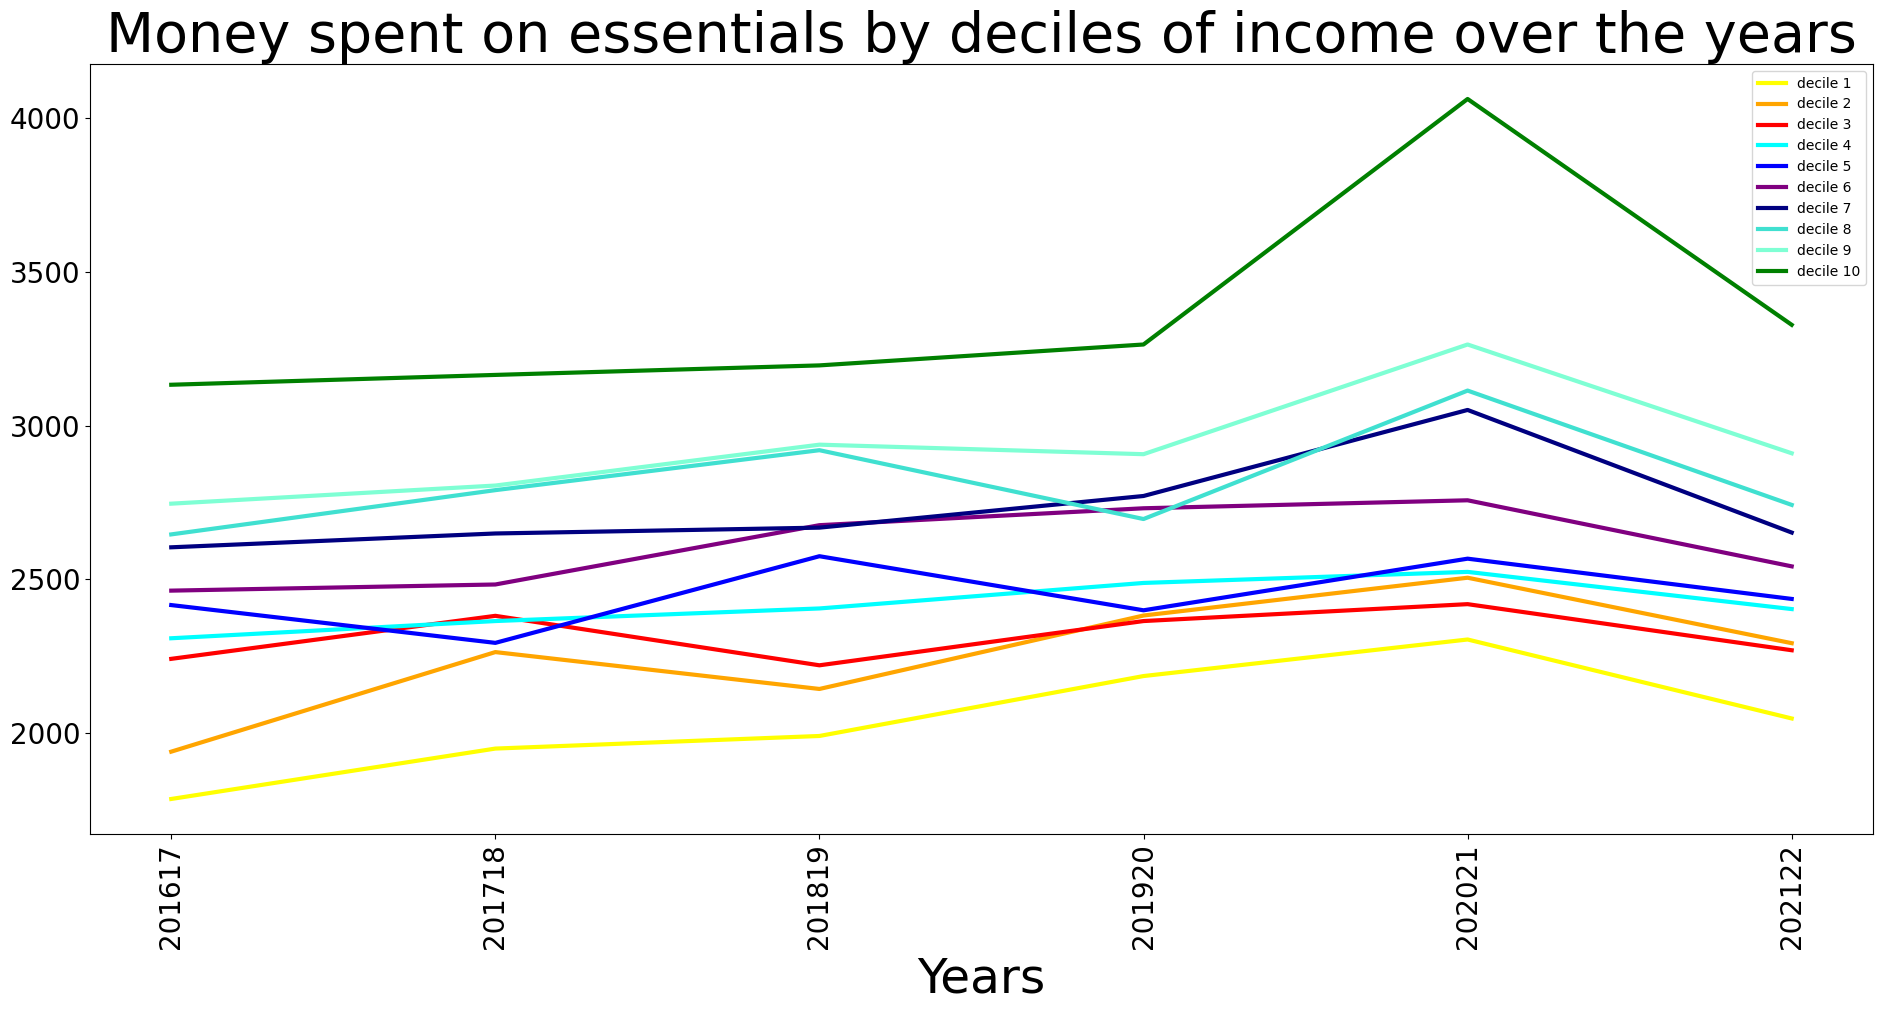

In [100]:
fig_dec = plt.figure(figsize=(23, 10))

decy = ["2017","2018","2019","2020","2021","2022"]


plt.title('Money spent on essentials by deciles of income over the years', fontsize = 40)
plt.xticks(rotation = 'vertical',fontsize = 20)
plt.xlabel('Years',fontsize = 35)
plt.yticks(fontsize = 20)


plt.plot(final_decile_1.columns,final_decile_1.iloc[0], color = 'yellow', linewidth = 3, label = "decile 1")
plt.plot(final_decile_2.columns,final_decile_2.iloc[0], color = 'orange', linewidth = 3, label = "decile 2")
plt.plot(final_decile_3.columns,final_decile_3.iloc[0], color = 'red', linewidth = 3, label = "decile 3")
plt.plot(final_decile_4.columns,final_decile_4.iloc[0], color = 'cyan', linewidth = 3, label = "decile 4")
plt.plot(final_decile_5.columns,final_decile_5.iloc[0], color = 'blue', linewidth = 3, label = "decile 5")
plt.plot(final_decile_6.columns,final_decile_6.iloc[0], color = 'purple', linewidth = 3, label = "decile 6")
plt.plot(final_decile_7.columns,final_decile_7.iloc[0], color = 'navy', linewidth = 3, label = "decile 7")
plt.plot(final_decile_8.columns,final_decile_8.iloc[0], color = 'turquoise', linewidth = 3, label = "decile 8")
plt.plot(final_decile_9.columns,final_decile_9.iloc[0], color = 'aquamarine', linewidth = 3, label = "decile 9")
plt.plot(final_decile_10.columns,final_decile_10.iloc[0], color = 'green', linewidth = 3, label = "decile 10")

plt.legend()

In [57]:
final_decile_5.columns

Index(['201617', '201718', '201819', '201920', '202021', '202122',
       'Unnamed: 32', 'Unnamed: 33'],
      dtype='object')

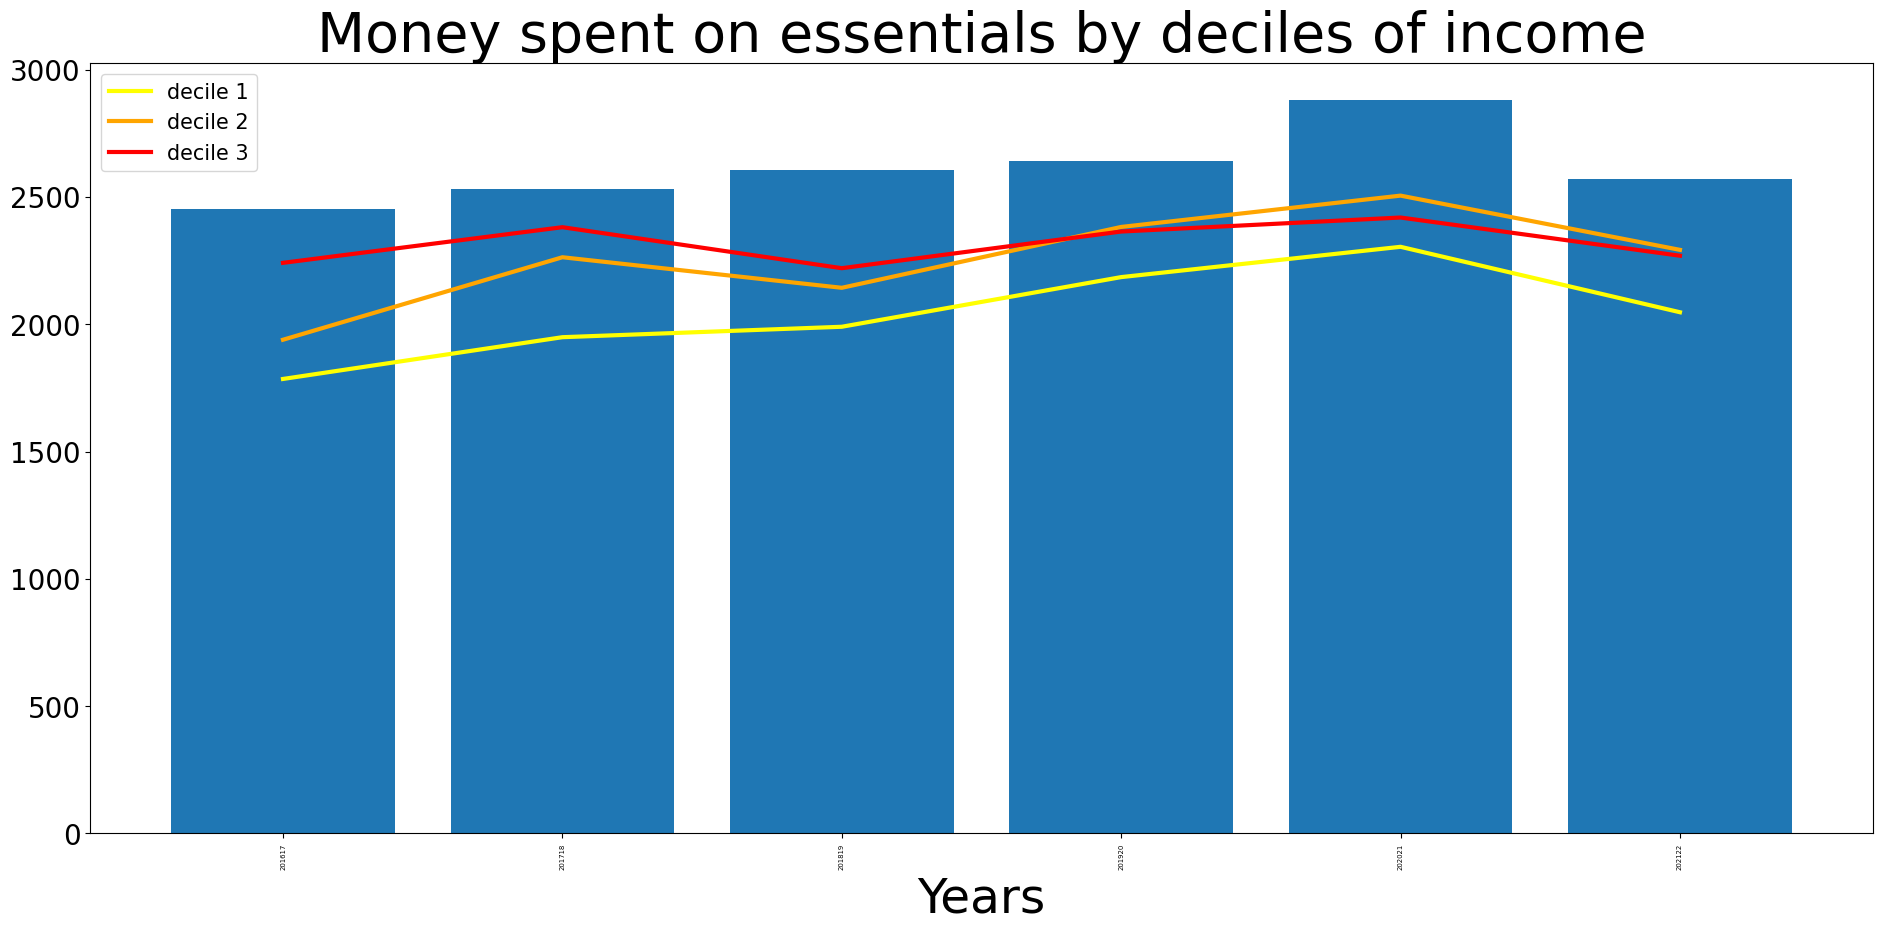

In [108]:
#Bottom 3 Deciles Plotted on the Bar Graph

fig_dec = plt.figure(figsize=(23, 10))

plt.title('Money spent on essentials by deciles of income', fontsize = 40)
plt.xticks(rotation = 'vertical',fontsize = 5)
plt.xlabel('Years',fontsize = 35)
plt.yticks(fontsize = 20)

plt.plot(final_decile_1.columns,final_decile_1.iloc[0], color = 'yellow', linewidth = 3, label = "decile 1")
plt.plot(final_decile_2.columns,final_decile_2.iloc[0], color = 'orange', linewidth = 3, label = "decile 2")
plt.plot(final_decile_3.columns,final_decile_3.iloc[0], color = 'red', linewidth = 3, label = "decile 3")
plt.bar(food_essentials_plot.columns,food_essentials_plot.iloc[0])

plt.legend(loc = "upper left", fontsize = 15)
plt.savefig("lower-decile.png")

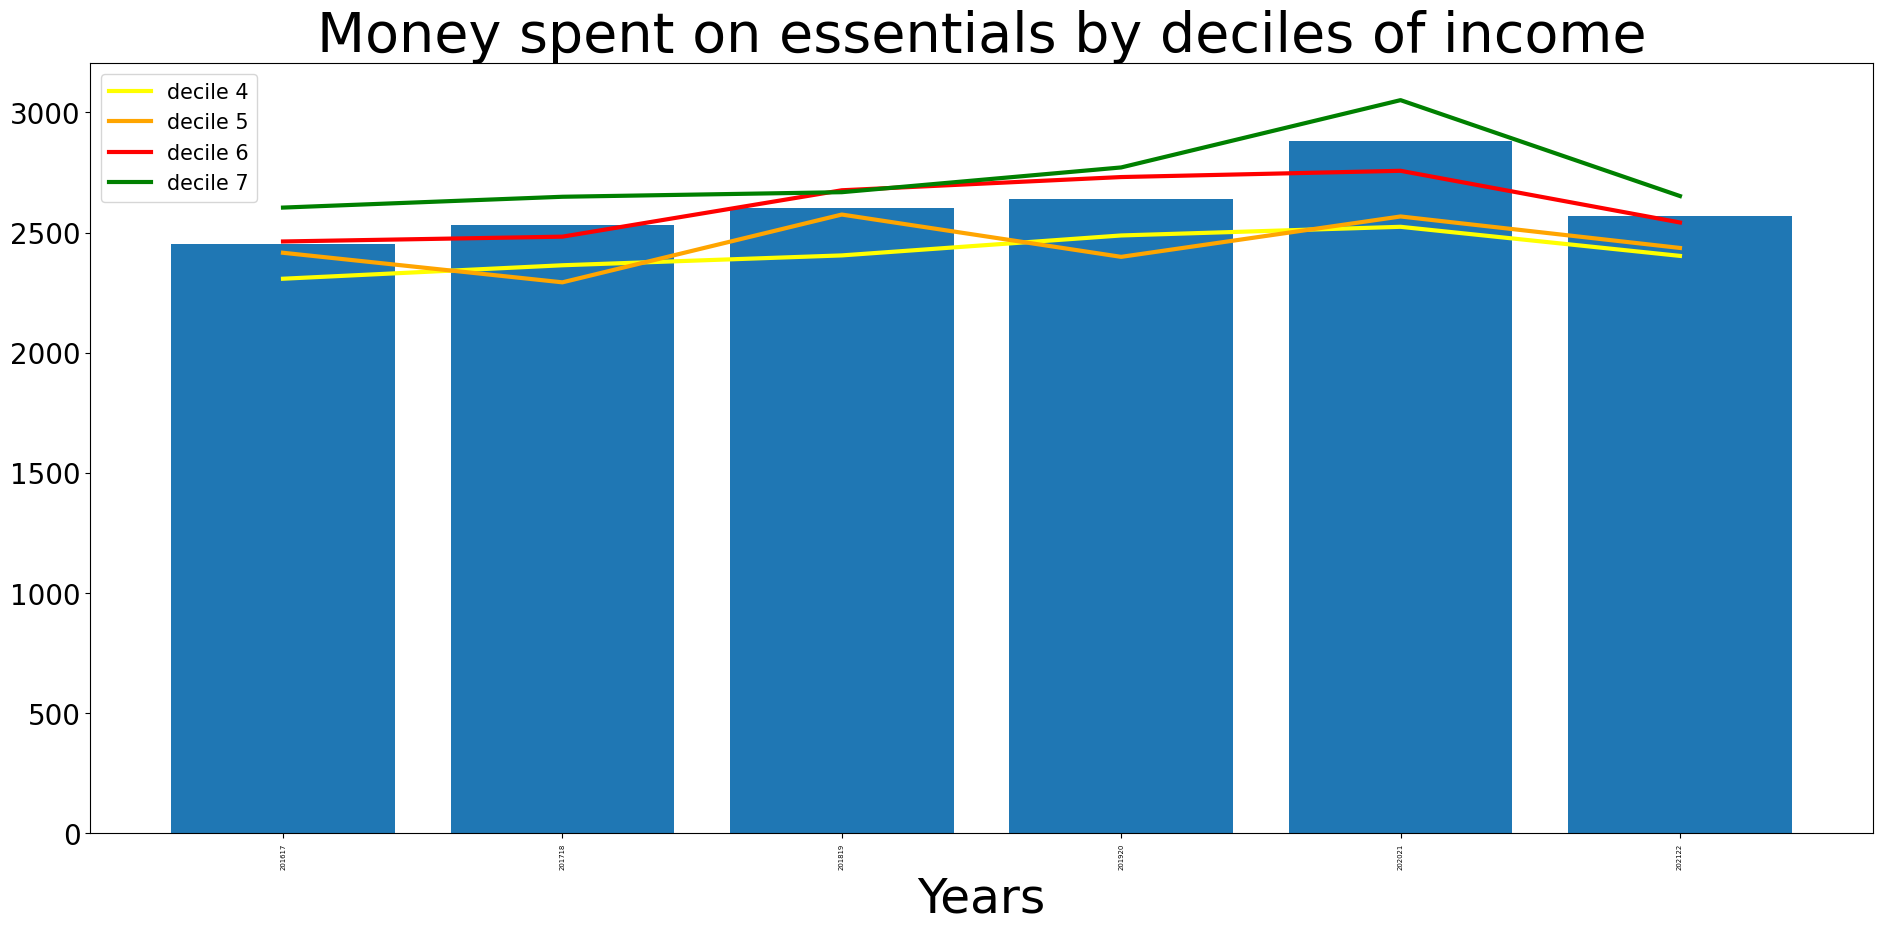

In [111]:
#Middle 4 Deciles Plotted on the Bar Graph

fig_dec = plt.figure(figsize=(23, 10))

plt.title('Money spent on essentials by deciles of income', fontsize = 40)
plt.xticks(rotation = 'vertical',fontsize = 5)
plt.xlabel('Years',fontsize = 35)
plt.yticks(fontsize = 20)

plt.plot(final_decile_4.columns,final_decile_4.iloc[0], color = 'yellow', linewidth = 3, label = "decile 4")
plt.plot(final_decile_5.columns,final_decile_5.iloc[0], color = 'orange', linewidth = 3, label = "decile 5")
plt.plot(final_decile_6.columns,final_decile_6.iloc[0], color = 'red', linewidth = 3, label = "decile 6")
plt.plot(final_decile_7.columns,final_decile_7.iloc[0], color = 'green', linewidth = 3, label = "decile 7")

plt.bar(food_essentials_plot.columns,food_essentials_plot.iloc[0])
plt.legend(loc = "upper left", fontsize = 15)
plt.savefig("middle-decile.png")

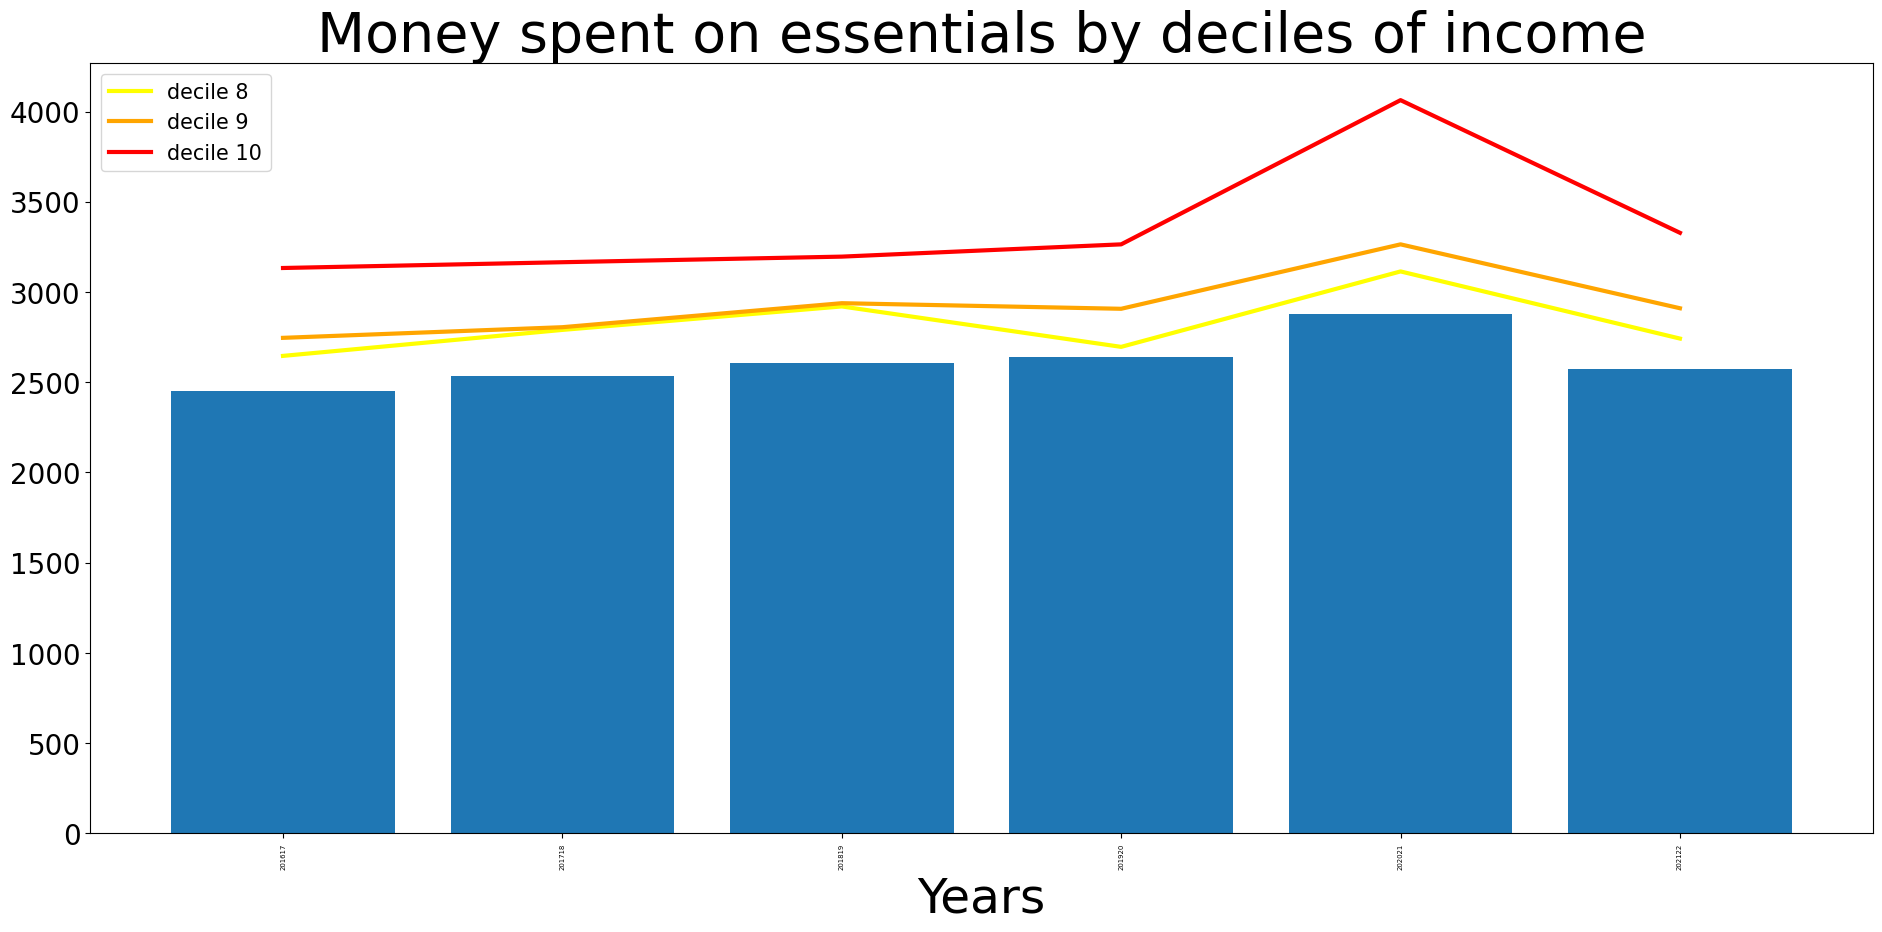

In [112]:
#Highest 3 Deciles Plotted on the Bar Graph

fig_dec = plt.figure(figsize=(23, 10))

plt.title('Money spent on essentials by deciles of income', fontsize = 40)
plt.xticks(rotation = 'vertical',fontsize = 5)
plt.xlabel('Years',fontsize = 35)
#plt.ylabel('Money in Pence',fontsize = 35)
plt.yticks(fontsize = 20)

plt.plot(final_decile_8.columns,final_decile_8.iloc[0], color = 'yellow', linewidth = 3, label = "decile 8")
plt.plot(final_decile_9.columns,final_decile_9.iloc[0], color = 'orange', linewidth = 3, label = "decile 9")
plt.plot(final_decile_10.columns,final_decile_10.iloc[0], color = 'red', linewidth = 3, label = "decile 10")


plt.bar(food_essentials_plot.columns,food_essentials_plot.iloc[0])

plt.legend(loc = "upper left", fontsize = 15)
plt.savefig("upper-decile.png")

In [22]:
trusell = pd.read_csv("Trussell_data/Local Authority-Table 1.csv", header = 1)
trusell.head(20)

,Local Authority,Region,Number of parcels for adults,Number of parcels for children,Total number of parcels distributed,Number of distribution centres,Number of parcels for adults.1,Number of parcels for children.1,Total number of parcels distributed.1,Number of distribution centres.1,...,Total number of parcels distributed.3,Number of distribution centres.3,Number of parcels for adults.4,Number of parcels for children.4,Total number of parcels distributed.4,Number of distribution centres.4,Number of parcels for adults.5,Number of parcels for children.5,Total number of parcels distributed.5,Number of distribution centres.5
0,Amber Valley,East Midlands,\t288,\t97,\t385,\t1,\t405,\t159,\t564,\t1,...,\t768,\t1,\t457,\t234,\t691,\t1,\t628,\t317,\t945,\t1
1,Bassetlaw,East Midlands,\t98,\t60,\t158,\t1,\t78,\t41,\t119,\t1,...,\t218,\t1,\t14,\t14,\t28,\t1,\t1,\t- 0,\t1,\t1
2,Blaby,East Midlands,\t413,\t181,\t594,\t1,\t298,\t240,\t538,\t1,...,"\t1,582",\t1,\t772,\t503,"\t1,275",\t1,"\t1,094",\t761,"\t1,855",\t1
3,Bolsover,East Midlands,\t660,\t420,"\t1,080",\t2,\t841,\t499,"\t1,340",\t1,...,"\t2,504",\t1,"\t1,045",\t471,"\t1,516",\t2,"\t1,788",\t875,"\t2,663",\t1
4,Boston,East Midlands,"\t1,438",\t952,"\t2,390",\t2,"\t1,431",\t833,"\t2,264",\t2,...,"\t1,562",\t1,"\t1,168",\t673,"\t1,841",\t1,"\t2,153","\t1,210","\t3,363",\t1
5,Broxtowe,East Midlands,"\t1,975","\t1,145","\t3,120",\t4,"\t2,153","\t1,479","\t3,632",\t4,...,"\t11,953",\t4,"\t3,704","\t2,455","\t6,159",\t4,"\t4,160","\t2,628","\t6,788",\t4
6,Charnwood,East Midlands,\t23,\t7,\t30,\t1,\t74,\t18,\t92,\t2,...,"\t6,441",\t3,"\t3,640","\t2,536","\t6,176",\t3,"\t4,322","\t3,012","\t7,334",\t3
7,Chesterfield,East Midlands,"\t2,299",\t896,"\t3,195",\t4,"\t2,797",\t891,"\t3,688",\t4,...,"\t5,251",\t6,"\t5,276","\t1,672","\t6,948",\t6,"\t6,881","\t2,900","\t9,781",\t7
8,Derbyshire Dales,East Midlands,\t- 0,\t- 0,\t- 0,\t- 0,\t- 0,\t- 0,\t- 0,\t- 0,...,\t- 0,\t- 0,\t- 0,\t- 0,\t- 0,\t- 0,\t57,\t72,\t129,\t1
9,Erewash,East Midlands,"\t1,114",\t528,"\t1,642",\t2,"\t1,406",\t552,"\t1,958",\t2,...,"\t2,323",\t2,"\t1,436",\t815,"\t2,251",\t2,"\t1,802",\t946,"\t2,748",\t2


In [23]:
trusell['Total number of parcels distributed']

Apr2017_to_31Mar2018 = 0
Apr2018_to_31Mar2019 = 0
Apr2019_to_31Mar2020 = 0
Apr2020_to_31Mar2021 = 0
Apr2021_to_31Mar2022 = 0
Apr2022_to_31Mar2023 = 0

list2017 = []
list2018 = []
list2019 = []
list2020 = []
list2021 = []
list2022 = []


for i in range(len(trusell['Total number of parcels distributed'])):
    list2017.append(int(trusell['Total number of parcels distributed'][i][2:-1].replace(",","").replace("- ","0")))

for i in range(len(trusell['Total number of parcels distributed.1'])):
    list2018.append(int(trusell['Total number of parcels distributed.1'][i][2:-1].replace(",","").replace("- ","0")))

for i in range(len(trusell['Total number of parcels distributed.2'])):
    list2019.append(int(trusell['Total number of parcels distributed.2'][i][2:-1].replace(",","").replace("- ","0")))
    
for i in range(len(trusell['Total number of parcels distributed.3'])):
    list2020.append(int(trusell['Total number of parcels distributed.3'][i][2:-1].replace(",","").replace("- ","0")))
    
for i in range(len(trusell['Total number of parcels distributed.4'])):
    list2021.append(int(trusell['Total number of parcels distributed.4'][i][2:-1].replace(",","").replace("- ","0")))
    
for i in range(len(trusell['Total number of parcels distributed.5'])):
    list2022.append(int(trusell['Total number of parcels distributed.5'][i][2:-1].replace(",","").replace("- ","0")))

In [24]:
Apr2017_to_31Mar2018 = sum(list2017)
Apr2018_to_31Mar2019 = sum(list2018)
Apr2019_to_31Mar2020 = sum(list2019)
Apr2020_to_31Mar2021 = sum(list2020)
Apr2021_to_31Mar2022 = sum(list2021)
Apr2022_to_31Mar2023 = sum(list2022)

<BarContainer object of 6 artists>

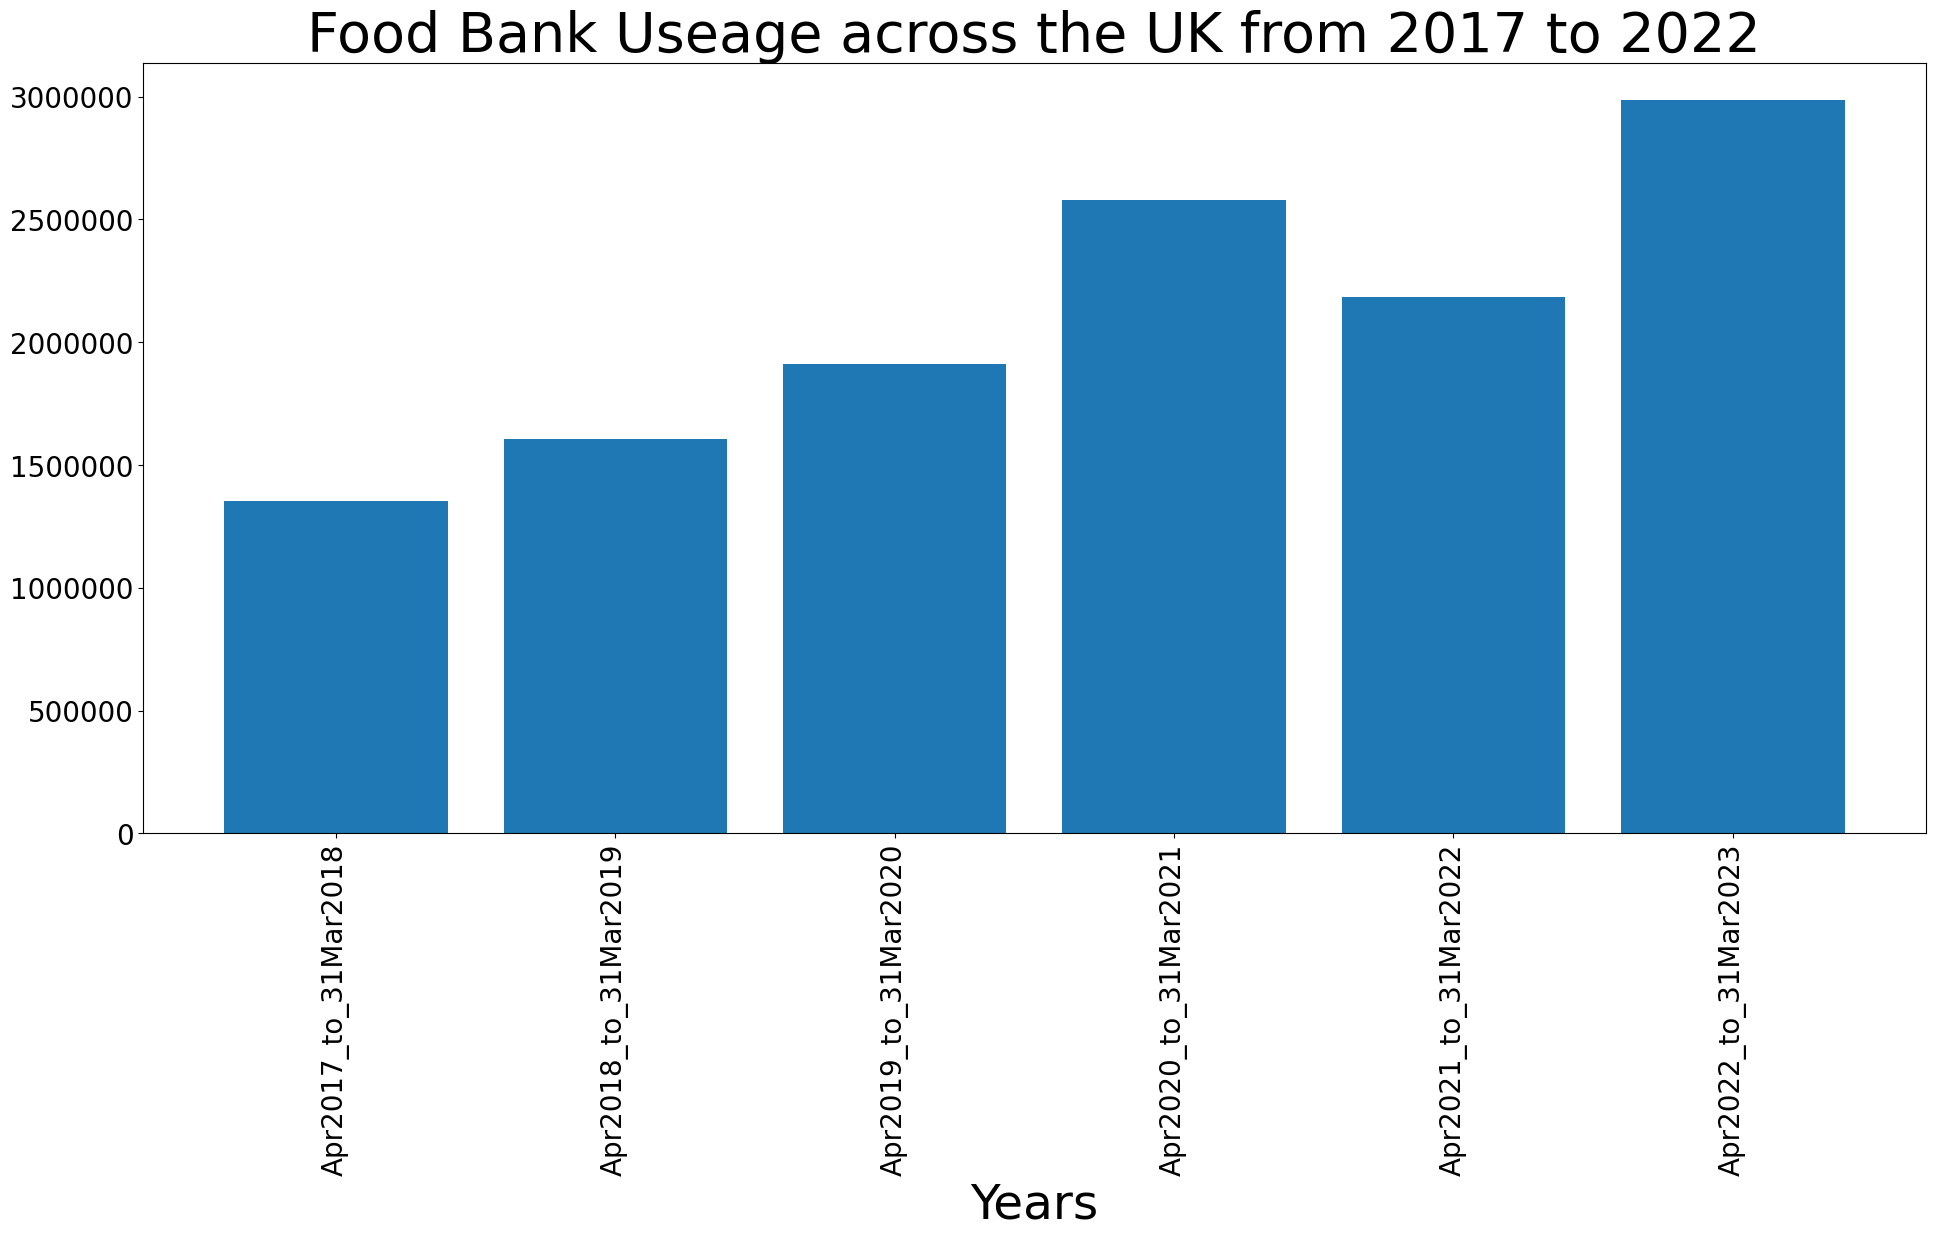

In [25]:
food_parcels_1722 = [Apr2017_to_31Mar2018, Apr2018_to_31Mar2019, Apr2019_to_31Mar2020,
                     Apr2020_to_31Mar2021, Apr2021_to_31Mar2022, Apr2022_to_31Mar2023]

food_parcels_1722_names = ["Apr2017_to_31Mar2018", "Apr2018_to_31Mar2019", "Apr2019_to_31Mar2020",
                     "Apr2020_to_31Mar2021", "Apr2021_to_31Mar2022", "Apr2022_to_31Mar2023"]



fig_dec = plt.figure(figsize=(23, 10))

plt.title('Food Bank Useage across the UK from 2017 to 2022', fontsize = 40)
plt.xticks(rotation = 'vertical',fontsize = 20)
plt.ticklabel_format(style='plain')
plt.xlabel('Years',fontsize = 35)
#plt.ylabel('Parcels Distributed',fontsize = 35)
plt.yticks(fontsize = 20)

plt.bar(food_parcels_1722_names, food_parcels_1722)